# Your info

Full name:

Student ID:

# Q1. Perceptron

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

def predict(input_arr, weights):
  activation = weights[0]
  for i in range(len(input_arr) - 1):
    activation += weights[i + 1] * input_arr[i]
  
  if activation >= 0.0:
    return 1.0
  return 0.0

def start_train_weights(input_arr, learn_rate, iter_count):
  weights = np.random.rand(len(input_arr[0]))

  for i in range(iter_count):

    for data in input_arr:
      error = data[-1] - predict(data, weights)

      vector = data.copy()
      vector = [1] + vector[0:2]
      # print("----------------------")
      # print(data)
      # print(vector)
      # print("----------------------")
      diff = np.dot(np.dot(vector, error), learn_rate)
      weights += diff

  return weights
      
def perceptron(test_data, train_data, learn_rate, iter_count):
  weights = start_train_weights(train_data, learn_rate, iter_count)

  result = []
  for data in test_data:
    result.append(predict(data, weights))
  
  return result

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# test predictions
train_dataset = [
           [0, 0, 1],
           [0, 1, 0],
           [1, 0, 0],
           [1, 1, 0]
]

test_dataset = [
           [0, 0, 1],
           [0, 1, 0]
]

result = perceptron(test_dataset, train_dataset, 0.6, 100)

print(result)



[1.0, 0.0]


# Q2. Binary Classification

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

from itertools import repeat
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
data_to_load = files.upload()

lines = data_to_load['data.txt'].decode() #data file name if you going to upload another data file you should change this name

train_dataset = []

lines = lines.split('\n')
for line in lines:
  splitted_string = line.split(",")
  if len(splitted_string) == 3:
    train_dataset.append(list(map(float, splitted_string)))


Saving data.txt to data.txt


In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.


def predict(input_arr, weights):
  activation = weights[0]
  for i in range(len(input_arr) - 1):
    activation += weights[i + 1] * input_arr[i]
  
  if activation >= 0.0:
    return 1.0, activation
  return 0.0, activation

# for i in range(len(input_arr)):
    
#     if input_arr[i][-1] == predict:
#       correct += 1

# def accuracy(input_arr, weights):
# 	correct = 0

#   for i in range(len(input_arr)):
#     correct +=1
    

# 	return correct / float(len(input_arr)) * 100.0



def accuracy(input_arr, weights):
  correct = 0
  for i in range(len(input_arr)):
    prediction, possible_error = predict(input_arr[i], weights)

    if input_arr[i][-1] == prediction:
      correct +=1

  return correct / float(len(input_arr)) * 100.0

def start_train_weights(input_arr, learn_rate, iter_count):
  weights = np.random.rand(len(input_arr[0]))
  accPerIter = []
  errosPerIter = []

  index = 0
  for i in range(iter_count):
    sum_error = 0

    for data in input_arr:
      prediction, possible_error = predict(data, weights)
      if data[-1] != prediction:

        error = data[-1] - prediction
        sum_error += possible_error

        vector = data.copy()
        vector = [1] + vector[0:2]
        diff = np.dot(np.dot(vector, error), learn_rate / (i + 1))
        weights += diff

    if error > 0.0:
      errosPerIter.append((i, np.log(sum_error)))
    accPerIter.append((i, accuracy(input_arr, weights)))

  return weights, errosPerIter, accPerIter
      
def perceptron(test_data, train_data, learn_rate, iter_count):
  weights = start_train_weights(train_data, learn_rate, iter_count)

  result = []
  for data in test_data:
    result.append(predict(data, weights))
  
  return result

def solve_eq(x1, weight1, bias, weight2):
  return float(-(bias + weight1 * x1) / float(weight2))

def plot_line_and_input(input_arr, weights):
    plt.title("Line and Inputs")
    plt.grid(True)

    min = 100000000000000000000
    max = -1000000000000000000
    for data in input_arr:
      if data[0] > max:
        max = data[0]
      
      if data[0] < min:
        min = data[0]

      
      plt.plot(data[0],data[1], 'ro' if (data[2] == 1.0) else 'bo', markersize=3)
    x1 = np.linspace(min, max, 1000)
    #since we have 2 weight therefore we can create line equation w1x1 + w2x2 + b = 0   ===>   x2 = -(b + w1x1)/w2
    x2 = list(map(solve_eq, x1, repeat(weights[1]), repeat(weights[0]), repeat(weights[2])))
    plt.plot(x1, x2, color='black');
    
    plt.show()

def plot_acc(acc_per_iter):

  iter = [x[0] for x in acc_per_iter]
  acc = [x[1] for x in acc_per_iter]
  plt.title("Line and Inputs")
  plt.grid(True)
  plt.plot(iter, acc, color='black');  
  plt.show()

def plot_err(err_per_iter):

  iter = [x[0] for x in err_per_iter]
  error = [x[1] for x in err_per_iter]
  plt.title("Error per iter")
  plt.grid(True)
  plt.plot(iter, error, color='black');  
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log


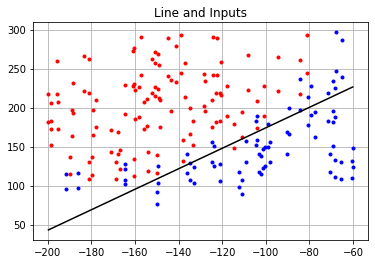

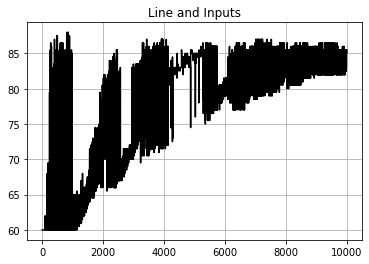

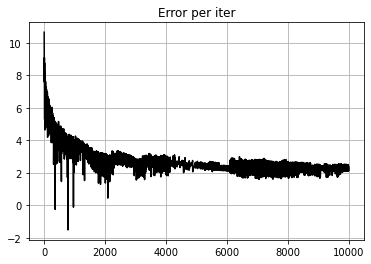

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.


weights, err, acc = start_train_weights(train_dataset, 0.2, 10000)

plot_line_and_input(train_dataset, weights)
plot_acc(acc)
plot_err(err)

# Q4. MLP

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Epoch 1/5
79/79 [==============================] - 1s 13ms/step - loss: 0.9345 - accuracy: 0.7319 - val_loss: 0.2596 - val_accuracy: 0.9284
Epoch 2/5
79/79 [==============================] - 1s 11ms/step - loss: 0.2367 - accuracy: 0.9367 - val_loss: 0.1674 - val_accuracy: 0.9548
Epoch 3/5
79/79 [==============================] - 1s 11ms/step - loss: 0.1667 - accuracy: 0.9533 - val_loss: 0.1217 - val_accuracy: 0.9678
Epoch 4/5
79/79 [==============================] - 1s 10ms/step - loss: 0.1216 - accuracy: 0.9672 - val_loss: 0.0923 - val_accuracy: 0.9786
Epoch 5/5
79/79 [==============================] - 1s 11ms/step - loss: 0.0913 - accuracy: 0.9780 - val_loss: 0.0729 - val_accuracy: 0.9828
Test loss: 0.07289772480726242
Test accuracy: 0.9828000068664551


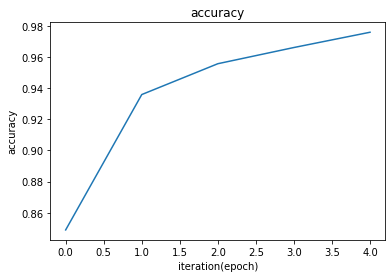

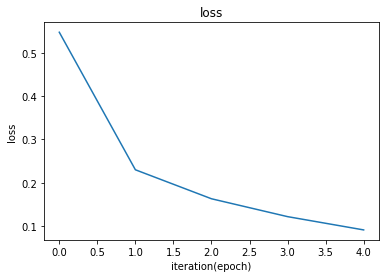

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

model = Sequential()
model.add(core.Dense(512, activation='relu', input_shape=(img_rows * img_cols,)))
model.add(core.Dense(10, activation='softmax'))

batch_size = 128
epochs = 5
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# prin(model.summry)
result = model.fit(x_test, y_test, batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

def show_model_accuracy(result):
  plt.title('accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('iteration(epoch)')
  plt.plot(result)
  plt.show()

def show_model_error(result):
  plt.title('loss')
  plt.ylabel('loss')
  plt.xlabel('iteration(epoch)')
  plt.plot(result)
  plt.show()

show_model_accuracy(result.history['accuracy']);
show_model_error(result.history['loss']);

# Q5. Back-Propagation

0
Cost at epoch#0: 1.3532159800466577
1
Cost at epoch#1: 0.4796743630134607
2
Cost at epoch#2: 0.47854074373978944
3
Cost at epoch#3: 0.47735889203187293
4
Cost at epoch#4: 0.4761360750697482
5
Cost at epoch#5: 0.4748790158202282
6
Cost at epoch#6: 0.4735935145629252
7
Cost at epoch#7: 0.47228474183748065
8
Cost at epoch#8: 0.4709574376059277
9
Cost at epoch#9: 0.46961498438846627
10
Cost at epoch#10: 0.46825724459601825
11
Cost at epoch#11: 0.4668786023962153
12
Cost at epoch#12: 0.46546837683970615
13
Cost at epoch#13: 0.4640146885974618
14
Cost at epoch#14: 0.4625106188203197
15
Cost at epoch#15: 0.46095993422606
16
Cost at epoch#16: 0.4593797365191909
17
Cost at epoch#17: 0.4577984478886863
18
Cost at epoch#18: 0.45624912900361303
19
Cost at epoch#19: 0.4547608429698936
20
Cost at epoch#20: 0.45335338757735943
21
Cost at epoch#21: 0.45203899256262
22
Cost at epoch#22: 0.4508280648812551
23
Cost at epoch#23: 0.4497323502661402
24
Cost at epoch#24: 0.4487626508833935
25
Cost at epoch

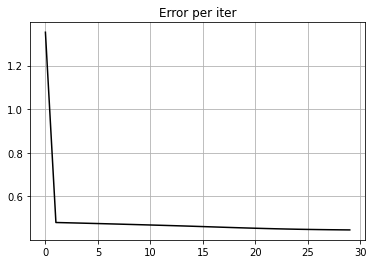

In [32]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports
from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

def params(n_in, n_out):
    params = dict()
    params['w'] = np.random.randn(n_out, n_in) / (np.sqrt(n_in)) 
    params['b'] = np.zeros((n_out, 1))

    return params


class Layer:
    def __init__(self, input_shape, n_out):
        self.params = params(input_shape[0], n_out)
        self.H = np.zeros((self.params['w'].shape[0], input_shape[1]))

    def forward(self, prev_layer_out):

        self.prev_layer_out = prev_layer_out
        self.H = np.dot(self.params['w'], self.prev_layer_out) + self.params['b'] #calculate current layer

    def backward(self, prev):
        self.dw = np.dot(prev, self.prev_layer_out.T) 

        self.db = np.sum(prev, axis=1, keepdims=True)

        self.dprev_layer = np.dot(self.params['w'].T, prev)

    def update_params(self, learning_rate):
        self.params['w'] = self.params['w'] - learning_rate * self.dw
        self.params['b'] = self.params['b'] - learning_rate * self.db

class Sigmoid:
    def __init__(self, shape):
        self.current_layer = np.zeros(shape)

    def forward(self, Z):
        self.current_layer = 1 / (1 + np.exp(-Z)) #Sigmoid

    def backward(self, prev):
        self.dz = prev * self.current_layer*(1-self.current_layer) #backward of Sigmoid


def loss(Y, Y_hat):
    number_of_inputs = Y.shape[1]
    cost = (1 / (2 * number_of_inputs)) * np.sum(np.square(np.subtract(Y, Y_hat)))
    cost = np.squeeze(cost)
    dy_hat = -1 / number_of_inputs * (Y - Y_hat)

    return cost, dy_hat



(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
learning_rate = 0.3
number_of_epochs = 30
np.random.seed(48) 
x_train = np.einsum('ij->ji', x_train)
x_test = np.einsum('ij->ji', x_test)


NN_ART = [
    {'layer': Layer(input_shape=x_train.shape, n_out=512), 'func': Sigmoid, 'res': None}
]

llayer = NN_ART[0]['layer']
func = NN_ART[0]['func']
NN_ART[0]['res'] = func(llayer.H.shape)

NN_ART.append({'layer': Layer(input_shape=NN_ART[0]['res'].current_layer.shape, n_out=10), 'func': Sigmoid, 'res':None})

llayer = NN_ART[1]['layer']
func = NN_ART[1]['func']
NN_ART[1]['res'] = func(llayer.H.shape)




def single_forward_train(nn, x_train, y_train):

  prev = None
  for layer in nn:
    llayer = layer['layer']
    current = layer['res']
    if prev != None:
      llayer.forward(prev.current_layer)
    else:
      llayer.forward(x_train)
    current.forward(llayer.H)
    prev = current
  
  return loss(Y=y_train, Y_hat=prev.current_layer)


def single_backward_train(nn, prev_back):

  nn = list(reversed(nn))
  prev = None
  for layer in nn:
    llayer = layer['layer']
    current = layer['res']
    if prev != None:
      current.backward(prev.dprev_layer)
    else:
      current.backward(prev_back)
    llayer.backward(current.dz)
    prev = llayer

def update_w_b(nn, learning_rate):
  nn = list(reversed(nn))
  prev = None
  for layer in nn:
    llayer = layer['layer']
    llayer.update_params(learning_rate=learning_rate)

def plot_err(err_per_iter):

  iter = [x[0] for x in err_per_iter]
  error = [x[1] for x in err_per_iter]
  plt.title("Error per iter")
  plt.grid(True)
  plt.plot(iter, error, color='black');  
  plt.show()

def predic(x_test, y_test):
  cost, _ = single_forward_train(NN_ART, x_test, y_test)
  print(f"error:{cost}")
costs = []

y_test = np.array(np.einsum('ij->ji', y_test))
y_train = np.array(np.einsum('ij->ji', y_train))
for epoch in range(number_of_epochs):
    print(epoch)
    cost, change = single_forward_train(NN_ART, x_train, y_train)
    costs.append((epoch, cost))
    print("Cost at epoch#{}: {}".format(epoch, cost))
    single_backward_train(NN_ART, change)
    update_w_b(NN_ART, learning_rate)

predic(x_test, y_test)
plot_err(costs)

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.s

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.